<a href="https://colab.research.google.com/github/MphoPetunia/SpecsSurveyData/blob/main/companyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Data Cleaning and Exploration***

In the first task we will be Loading and Exploring the dataset

In [14]:
import pandas as pd

data =pd.read_csv("Dots Customer Survey.csv")
data.head()




,Unique ID,Country,Age,Annual Family Income ($),Gender,Time spent watching videos/TV,Time spent playing indoor sports,Time spent playing outdoor sports,Total Time spent working in front of screen,Sleeping hours,...,Has OTT subscription,Number of friends,Likes spicy food,Likes desserts,Wants to change career,Has debt,Has kids,Drinks alcohol,Smoker,Wear Specs
0,7319483,CAN,13,20423,Male,3,4,3,7,8,...,1,4,0,1,0,0,0,0,0,1
1,4791965,CAN,13,5570,Female,3,3,1,10,3,...,1,6,0,1,0,0,0,0,1,1
2,2991718,CAN,13,58706,Female,2,2,1,4,9,...,0,5,0,0,0,0,0,0,0,0
3,4220106,CAN,13,57118,Male,6,2,4,10,11,...,1,9,0,1,0,0,0,0,0,0
4,2263008,CAN,14,59834,Male,6,3,4,13,12,...,1,6,1,0,0,0,0,0,0,0


In [15]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

print("\nSummary Statistics:")
print(data.describe())


Missing Values:
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorced)    0
Has Dia

In [16]:
# Fill missing values for numerical columns with the median
numerical_columns = ["Time spent playing outdoor sports", "Total Time spent working in front of screen"]
for column in numerical_columns:
    data[column].fillna(data[column].median())

# Fill missing values for categorical columns with the mode
categorical_columns = ["Whether parents have specs"]
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0])

# Verify that no missing values remain
print("Missing Values After Imputation:")
print(data.isnull().sum())



Missing Values After Imputation:
Unique ID                                                  0
Country                                                    0
Age                                                        0
Annual Family Income ($)                                   0
Gender                                                     0
Time spent watching videos/TV                              0
Time spent playing indoor sports                           0
Time spent playing outdoor sports                          0
Total Time spent working in front of screen                0
Sleeping hours                                             0
IQ                                                         0
Whether parents have specs                                 0
English speaker                                            0
Migrated within country                                    0
Migrated overseas                                          0
Maritial Status (0 - Single, 1 - Married, 2 - Divorc

In [17]:
# Replacing inegative values with NaN for specific columns
columns_to_check = ["Sleeping hours", "Time spent playing outdoor sports", "Total Time spent working in front of screen"]
for column in columns_to_check:
    data[column] = data[column].apply(lambda x: x if x >= 0 else None)

# Filling the new NaN values with the median
for column in columns_to_check:
    data[column].fillna(data[column].median())

# Verifying that all values are valid
print("Minimum values after fixing invalid data:")
print(data[columns_to_check].min())


Minimum values after fixing invalid data:
Sleeping hours                                 0.0
Time spent playing outdoor sports              0.0
Total Time spent working in front of screen    0.0
dtype: float64


Outliers are extreme values tjat fall outside a reasonable range.
The IQR method identifies outliers as values outside 1.5 time the interquartile range.

In [18]:
# Function to handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definning lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing outliers with NaN
    df[column] = df[column].apply(lambda x: x if lower_bound <= x <= upper_bound else None)
    return df

# Applying the function to relevant columns
columns_to_check = ["Sleeping hours", "Time spent playing outdoor sports", "Total Time spent working in front of screen"]
for col in columns_to_check:
    data = handle_outliers(data, col)

# Impute any new NaN values created by outlier removal
for col in columns_to_check:
    data[col] = data[col].fillna(data[col].median())

# Verifying the changes
print("\nSummary Statistics After Handling Outliers:")
print(data[columns_to_check].describe())



Summary Statistics After Handling Outliers:
       Sleeping hours  Time spent playing outdoor sports  \
count     3220.000000                        3220.000000   
mean         7.673292                           1.766770   
std          2.029321                           1.118603   
min          2.000000                           0.000000   
25%          6.000000                           1.000000   
50%          8.000000                           2.000000   
75%          9.000000                           3.000000   
max         13.000000                           5.000000   

       Total Time spent working in front of screen  
count                                  3220.000000  
mean                                      8.157453  
std                                       2.710488  
min                                       0.000000  
25%                                       6.000000  
50%                                       8.000000  
75%                                      10

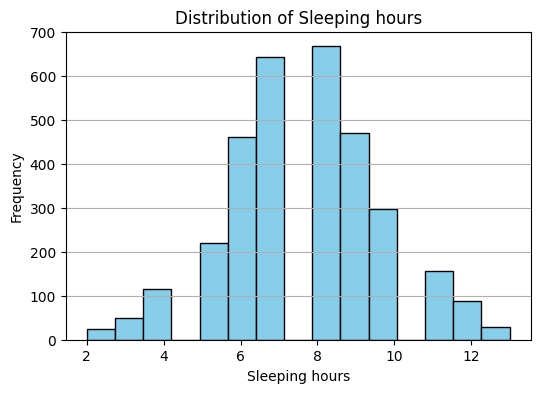

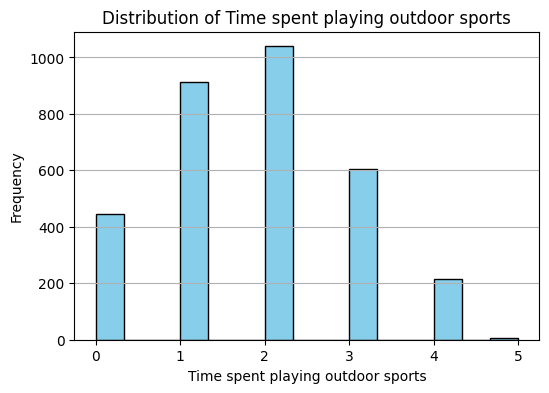

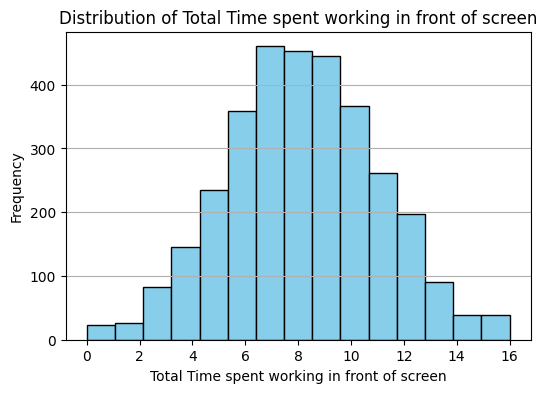

In [19]:
import matplotlib.pyplot as plt

# Plotting distributions
columns_to_plot = ["Sleeping hours", "Time spent playing outdoor sports", "Total Time spent working in front of screen"]

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=15, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y')
    plt.show()


The purpose of cleaning the data in the first step was to ensure the dataset was  accurate, consistent and ready for anaysis and model training.

-Cleaning ensures consistency across all ddata points, removing potential errors or inconsistencies that could negaively impact the model's ability to find patterns.

-Handling missing  values is important because missing values can confuse the machine learning model as it does not know how to interpret blank spaces.


# *Feature Engineering and Visualization*

The second task focuses on enhancing the dataset by creating features and exploring the relationship between variables to gain insights and improve the model's performance.

Feature Engineering helps with:


*   Creating new variables that might capture hidden patterns.
*   Improve the accuracyof predictions by providing the model with more relevant data.







In [20]:
#Creating New Features
#A few potential new features for this dataset may include;
#1. Screen-to-sleep Ratio
#2. Active Ratio
#3. Sleep Sufficiency

# Create Screen-to-Sleep Ratio
data['Screen_to_Sleep_Ratio'] = data['Total Time spent working in front of screen'] / data['Sleeping hours']

# Create Active Ratio
data['Active_Ratio'] = data['Time spent playing outdoor sports'] / (data['Total Time spent working in front of screen'] + 1e-5)

# Create Sleep Sufficiency (7+ hours is sufficient)
data['Sleep_Sufficiency'] = data['Sleeping hours'].apply(lambda x: 'Sufficient' if x >= 7 else 'Insufficient')

# Verify new features
print("New Features Summary:")
print(data[['Screen_to_Sleep_Ratio', 'Active_Ratio', 'Sleep_Sufficiency']].head())


New Features Summary:
   Screen_to_Sleep_Ratio  Active_Ratio Sleep_Sufficiency
0               0.875000      0.428571        Sufficient
1               3.333333      0.100000      Insufficient
2               0.444444      0.249999        Sufficient
3               0.909091      0.400000        Sufficient
4               1.083333      0.307692        Sufficient


In [28]:
print(data.columns)

Index(['Unique ID', 'Country', 'Age', 'Annual Family Income ($)', 'Gender',
       'Time spent watching videos/TV', 'Time spent playing indoor sports',
       'Time spent playing outdoor sports',
       'Total Time spent working in front of screen', 'Sleeping hours', 'IQ',
       'Whether parents have specs', 'English speaker',
       'Migrated within country', 'Migrated overseas',
       'Maritial Status (0 - Single, 1 - Married, 2 - Divorced)',
       'Has Diabetes', 'Education Status', 'Has Gym Subscription',
       'Has OTT subscription', 'Number of friends', 'Likes spicy food',
       'Likes desserts', 'Wants to change career', 'Has debt', 'Has kids',
       'Drinks alcohol', 'Smoker', 'Wear Specs', 'Screen_to_Sleep_Ratio',
       'Active_Ratio', 'Sleep_Sufficiency'],
      dtype='object')


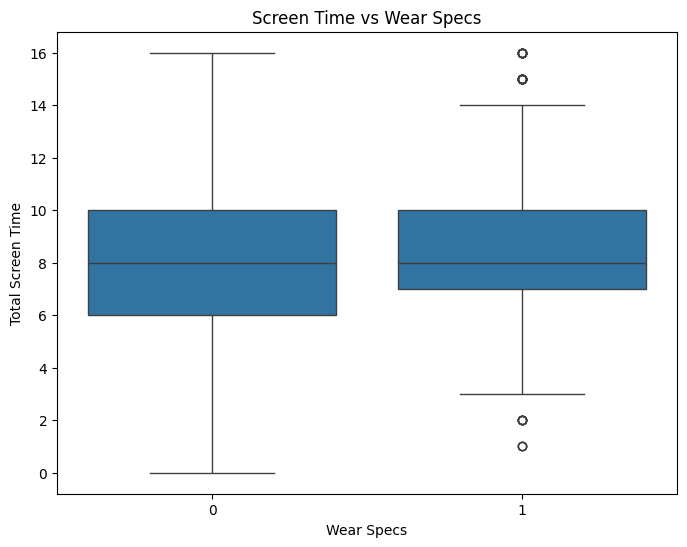

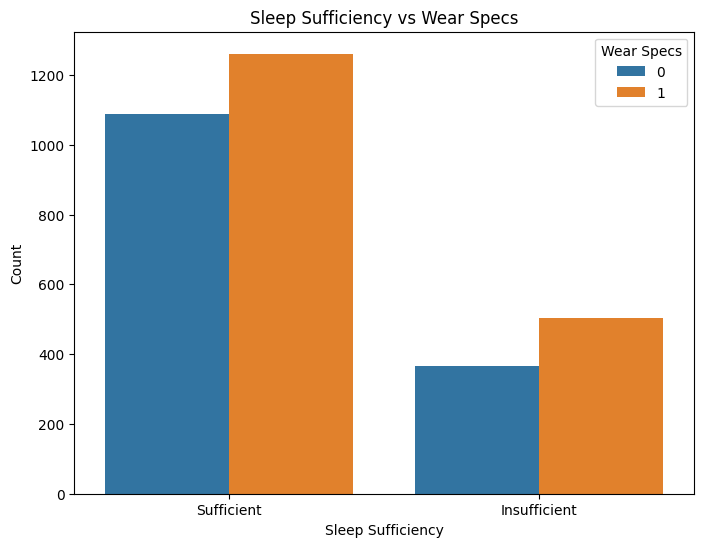

In [30]:
#Exploring Relationships
#Visualizing data helps identify patterns and relationships between variables for example:
#1. Relationship between screen time and WearsSpecs
#2. Impact to sleep sufficiency on Wear Specs


import seaborn as sns
import matplotlib.pyplot as plt

# Plot the relationship between Screen Time and Glasses Usage
plt.figure(figsize=(8, 6))
sns.boxplot(x='Wear Specs', y='Total Time spent working in front of screen', data=data)
plt.title("Screen Time vs Wear Specs")
plt.xlabel("Wear Specs")
plt.ylabel("Total Screen Time")
plt.show()

# Bar plot for Sleep Sufficiency and Glasses Usage
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep_Sufficiency', hue='Wear Specs', data=data)
plt.title("Sleep Sufficiency vs Wear Specs")
plt.xlabel("Sleep Sufficiency")
plt.ylabel("Count")
plt.show()


Step 3: Exploring Relationships with Scatter Plots

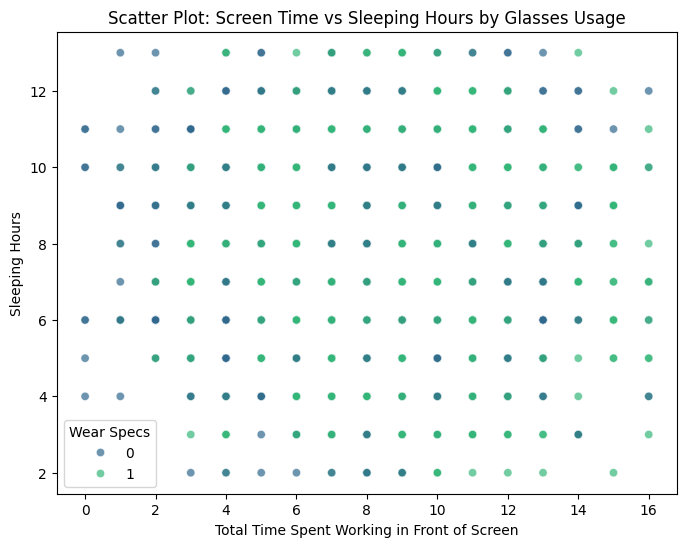

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Total Time spent working in front of screen',
    y='Sleeping hours',
    hue='Wear Specs',
    data=data,
    palette='viridis',
    alpha=0.7
)
plt.title("Scatter Plot: Screen Time vs Sleeping Hours by Glasses Usage")
plt.xlabel("Total Time Spent Working in Front of Screen")
plt.ylabel("Sleeping Hours")
plt.legend(title="Wear Specs")
plt.show()


Step 4: Performing Correlation Anaysis
Ina the final step I will copute a correlation matrix to identify correlation features.
In the final step I will compute a correlation matrix to identify correlated features.

# Model Building and Evaluation

The evaluation of this machine learning model highlights critical factors influencing eyewear usage among surveyed individuals. By understanding these predictors, stakeholders can make informed decisions in marketing, health awareness, and product development tailored to consumer needs. The insights derived from this analysis not only enhance our understanding of consumer behavior but also provide actionable strategies for businesses and health organizations.